# 2. Sarcomere Detection Module Tutorial

This notebook demonstrates the use of the `detection.py` module to detect and measure Z-discs and sarcomeres in frames loaded from an ND2 video file.

The module utilizes parallel processing for efficiency and saves the results in a compressed NumPy (`.npz`) file for later use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nd2 # For reading ND2 files

from pathlib import Path
from sarcgraph import SarcGraph

# Import the core function from your module
from src.detection import process_all_frames_for_sarcomeres

# --- Configuration ---
INPUT_DIR = Path("data")
OUTPUT_DIR = Path("results")

ND2_FILENAME = "Quartz.2862.D1.Myk.baseline.GFP.m002.nd2" # <<< IMPORTANT: CHANGE THIS TO YOUR ND2 FILE NAME
OUTPUT_FILENAME = ND2_FILENAME[:-4]

# Define paths
OUTPUT_DIR.mkdir(parents=True, exist_ok=True) # Ensure output directory exists

# --- Initialize SarcGraph Object ---
sg = SarcGraph(
    input_type='image',
    zdisc_min_length=15,
    zdisc_max_length=75,
    sigma=2.0,
    min_sarc_length=7.5,
    avg_sarc_length=10.5,
    max_sarc_length=13.5,
    num_neighbors=5,
    angle_threshold=1.7,
)

output_dir = output
input_type = image
save_output = True
sigma = 2.0
zdisc_min_length = 15
zdisc_max_length = 75
full_track_ratio = 0.75
tp_depth = 4
skip_merge = False
num_neighbors = 5
avg_sarc_length = 10.5
min_sarc_length = 7.5
max_sarc_length = 13.5
coeff_avg_length = 1.0
coeff_neighbor_length = 1.0
coeff_neighbor_angle = 1.0
score_threshold = 0.1
angle_threshold = 1.7


<div style="background-color: #e6f7ff; border-left: 6px solid #1890ff; padding: 16px; margin: 16px 0; border-radius: 4px; color: black;">
<h4><b>Note on Processing Time</b></h4>
<p>
The Sarcomere Detection process with a high number of frames can be very computationally intensive and may take a significant amount of time to complete. Depending on the size of your video, this step could run for <b>2 hours or more</b>.
</p>
</div>

In [2]:
# --- 1. Load ND2 Video ---
nd2_file_path = INPUT_DIR / ND2_FILENAME
with nd2.ND2File(nd2_file_path) as f:
    all_frames = np.array(f)
print(f"Loaded {len(all_frames)} frames.")

# --- 2. Run Detection ---
output_bbox_file_path = OUTPUT_DIR / OUTPUT_FILENAME
process_all_frames_for_sarcomeres(all_frames=all_frames, sarcgraph_instance=sg, save_filename=output_bbox_file_path, num_processes=2)
print("Sarcomere detection complete.")

Loaded 1519 frames.
INFO: Using 2 processes for parallel sarcomere detection.
INFO: Aggregated results for frame 200/1519
INFO: Aggregated results for frame 400/1519
INFO: Aggregated results for frame 600/1519
INFO: Aggregated results for frame 800/1519
INFO: Aggregated results for frame 1000/1519
INFO: Aggregated results for frame 1200/1519
INFO: Aggregated results for frame 1400/1519
INFO: Aggregated Z-disc and Sarcomere data saved to: results/Quartz.2862.D1.Myk.baseline.GFP.m002_detection_results.npz
Sarcomere detection complete.


Loaded Z-discs (shape: (1139818, 8)) and Sarcomeres (shape: (896969, 8)).


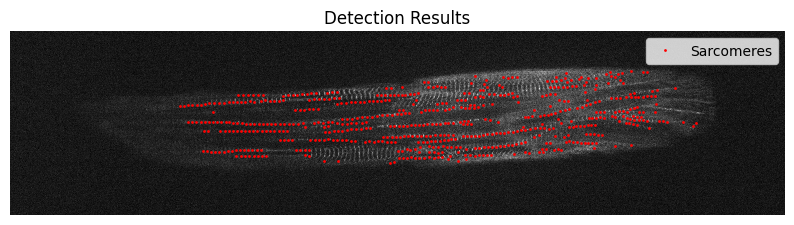

In [23]:
# --- 3. Load Results ---
zdiscs_csv_path = Path(f"{output_bbox_file_path}_zdiscs.csv")
sarcomeres_csv_path = Path(f"{output_bbox_file_path}_sarcomeres.csv")
zdiscs_df = pd.read_csv(zdiscs_csv_path)
sarcomeres_df = pd.read_csv(sarcomeres_csv_path)
print(f"Loaded Z-discs (shape: {zdiscs_df.shape}) and Sarcomeres (shape: {sarcomeres_df.shape}).")

# --- 4. Visualize Results ---
frame_idx_to_visualize = 0
df_temp = sarcomeres_df[sarcomeres_df.frame == frame_idx_to_visualize]

plt.figure(figsize=(10, 10))
plt.title("Detection Results")
plt.axis('off')
plt.imshow(all_frames[frame_idx_to_visualize], cmap='gray', interpolation='nearest')
plt.plot(df_temp.y, df_temp.x, 'r.', markersize=2, label='Sarcomeres')
plt.legend()